# Table of Contents
* [Introduction](#Introduction)
	* [Guiding questions](#Guiding-questions)
	* [Related notebooks](#Related-notebooks)
* [Setup](#Setup)
	* [Imports](#Imports)
	* [Load data](#Load-data)
* [Analysis](#Analysis)
* [Conclusions](#Conclusions)
	* [Key findings](#Key-findings)
	* [Next steps](#Next-steps)


# Introduction

**Prior work/ previous next steps**

table_parse_early_tests.ipynb

## Guiding questions

* Guiding question 1
* Guiding question 2

## Related notebooks

* **Copied from:** N/A
* **Purpose of copy:** N/A 
* **Copied to:** N/A
* **Purpose of copy:** N/A
* **Related notebooks:** N/A

<div class="alert alert-info"> Use this box for important points, reminders</div>

# Setup

## Imports

In [1]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
import hashlib
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

In [2]:
%%capture
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light solarized
plt.rcParams['grid.linewidth'] = 0
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [19]:
import os
import cv2

import PIL.Image as Image
from skimage import filters
from skimage import measure

from urllib.request import url2pathname

In [20]:
%load_ext version_information
%reload_ext version_information
%version_information numpy, matplotlib, pandas, scipy, cv2, skimage, PIL

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software,Version
Python,3.6.1 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython,6.0.0
OS,Darwin 16.6.0 x86_64 i386 64bit
numpy,1.12.1
matplotlib,2.0.2
pandas,0.20.1
scipy,0.19.0
cv2,3.2.0
skimage,0.13.0
PIL,4.1.1


## Load data 

* **File:** 
* **Description of data:**
* ** compute and store hashes to verify the expected version of dataset is being used**

## code

In [5]:
def compute_data_hash(data_path):
    with open(data_path, 'rb') as f:
        md5_hash = hashlib.md5(f.read()).hexdigest()
        print(data_path, md5_hash)
    return md5_hash

def compute_and_write_hashes(data_files, json_filename):
    data_hashes = {dfp: compute_data_hash(dfp) for dfp in data_files}
    output_dir = 'data_hashes'
    try:
        os.mkdir(output_dir)
    except FileExistsError:
        pass
    
    with open(os.path.join(output_dir, json_filename), 'w') as f:
        json.dump(data_hashes, f)

In [9]:
data_root_path = ''
data_file_1 = ''
data_path_1 = os.path.join(data_root_path, data_file_1)

data_file_paths = [data_path_1, ]

In [13]:
hard_image = '/Users/schwenk/wrk/tableparse/data/tricky_tables/unnamed-3.png'
another_image = '/Users/schwenk/wrk/tableparse/data/tricky_tables/unnamed-2.png'
easy_image = '/Users/schwenk/wrk/tableparse/vision-tableparse/examples/example_1.png'

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var window_name = window.location.href;
var command = "notebook_url = \"" + escape(window_name) + "\""
kernel.execute(command);

In [12]:
nb_filename = url2pathname(notebook_url).split('/')[-1]
if nb_filename.endswith('#'):
    nb_filename = nb_filename[:-1]
json_filename = nb_filename.replace('ipynb', 'json')

compute_and_write_hashes(data_file_paths, json_filename)
print('on date:')
!date

# Analysis

In [29]:
img = cv2.imread(another_image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

val = filters.threshold_otsu(gray)
mask = gray < 250
convert_mask =  mask * np.ones_like(mask) * 255

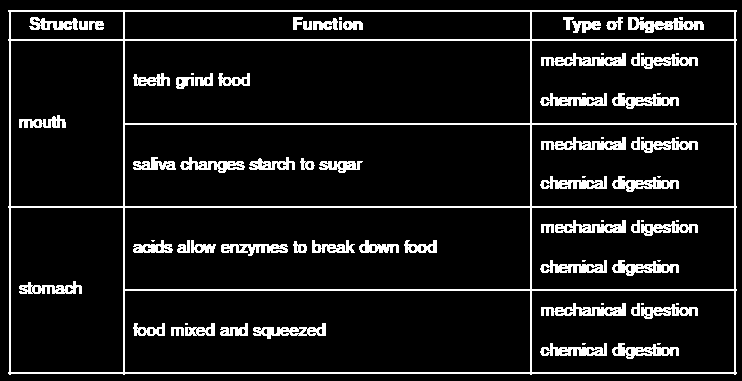

In [30]:
Image.fromarray(convert_mask.astype(np.uint8)).convert('RGB')

In [31]:
%%capture
n = 100
l = 256
im = filters.gaussian_filter(convert_mask, sigma=l / (4. * n))
# im = filters.median(convert_mask)

blobs = im > im.mean()
all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

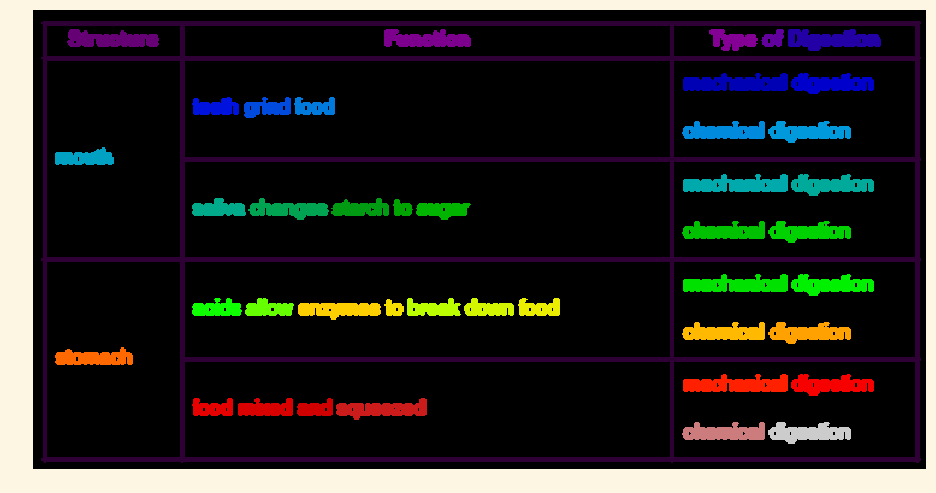

In [36]:
plt.imshow(blobs_labels, cmap='nipy_spectral')
_ = plt.axis('off')

In [37]:
cc = blobs_labels == 1
# cc = blobs_labels == 1
convert_mask =  cc * np.ones_like(cc) * 255
mimage = Image.fromarray(convert_mask.astype(np.uint8))

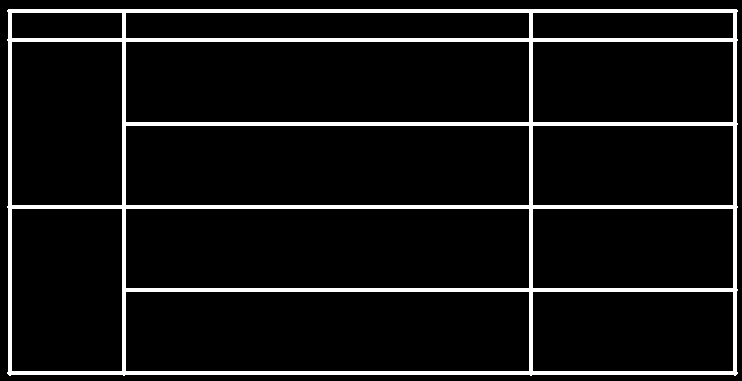

In [38]:
mimage.convert('RGB')

In [35]:
im2, contours, hierarchy = cv2.findContours(convert_mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

tc = contours[1]
reshaped_tc = tc.reshape((tc.shape[0], 2))

print(reshaped_tc[:,:1].min(), reshaped_tc[:,1:].min(), '    ' ,reshaped_tc[:,:1].max(), reshaped_tc[:,1:].max())

532 291      733 371


# Conclusions

## Key findings

* Key finding 1

## Next steps

* Next steps 1